In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

V tomto notebooku spravíme základnú analýzu údajov.

Jednotlivé datasety(vstupné vektory a očakávané hodnoty) sú vytvárané v osobitných notebookoch dataset1.ipynb, dataset2.ipynb, dataset3.ipynb. Ďalšie datasety, dataset4 a dataset5, budeme robiť v neskorších fázach projektu.  

In [9]:
gameInput = pd.read_csv("nhl-game-data/game.csv")
goalieInput = pd.read_csv("nhl-game-data/game_goalie_stats.csv")
skaterStatsInput = pd.read_csv("nhl-game-data/game_skater_stats.csv")
teamsStatsInput = pd.read_csv("nhl-game-data/game_teams_stats.csv")
teamInfoInput = pd.read_csv("nhl-game-data/team_info.csv")

## Table Game 
- tabuľka obsahujúca základné dáta o zápasoch

In [10]:
print(gameInput.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11434 entries, 0 to 11433
Data columns (total 16 columns):
game_id                   11434 non-null int64
season                    11434 non-null int64
type                      11434 non-null object
date_time                 11434 non-null object
date_time_GMT             11434 non-null object
away_team_id              11434 non-null int64
home_team_id              11434 non-null int64
away_goals                11434 non-null int64
home_goals                11434 non-null int64
outcome                   11434 non-null object
home_rink_side_start      11140 non-null object
venue                     11434 non-null object
venue_link                11434 non-null object
venue_time_zone_id        11434 non-null object
venue_time_zone_offset    11434 non-null int64
venue_time_zone_tz        11434 non-null object
dtypes: int64(7), object(9)
memory usage: 1.4+ MB
None


Priemerný počet gólov v domácich - 2.93 a hosťujúcich - 2.66 zápasoch

In [16]:
print((gameInput.home_goals).mean())
print((gameInput.away_goals).mean())

2.929333566555886
2.659174392163722


Priemerný počet gólov na zápas - 5.59.

In [17]:
print((gameInput.away_goals + gameInput.home_goals).mean())

5.5885079587196085


Keďže priemerný počet gólov na zápas je niekde medzi 5 a 6 gólmi na zápas, tak spravíme porovnanie počtu zápasov s počtom gólov 5 a 6

In [27]:
print(gameInput.loc[(gameInput.home_goals + gameInput.away_goals) == 5].game_id.count())
print(gameInput.loc[(gameInput.home_goals + gameInput.away_goals) == 5].game_id.count() / gameInput.game_id.count() * 100)
print(gameInput.loc[(gameInput.home_goals + gameInput.away_goals) == 6].game_id.count())
print(gameInput.loc[(gameInput.home_goals + gameInput.away_goals) == 6].game_id.count() / gameInput.game_id.count() * 100)

2799
24.479622179464755
1191
10.416302256428196


Z toho vyplýva, že ak by sme tipovali, že v zápase padne **5 gólov**, tak by sme úhádli približne každý 4 zápas( úspešnosť **24.48%** ).
No ak by sme tipovali, že v zápase padne **6 gólov**, tak by sme úhádli približne každý 9 zápas( úspešnosť **10.42%** ).

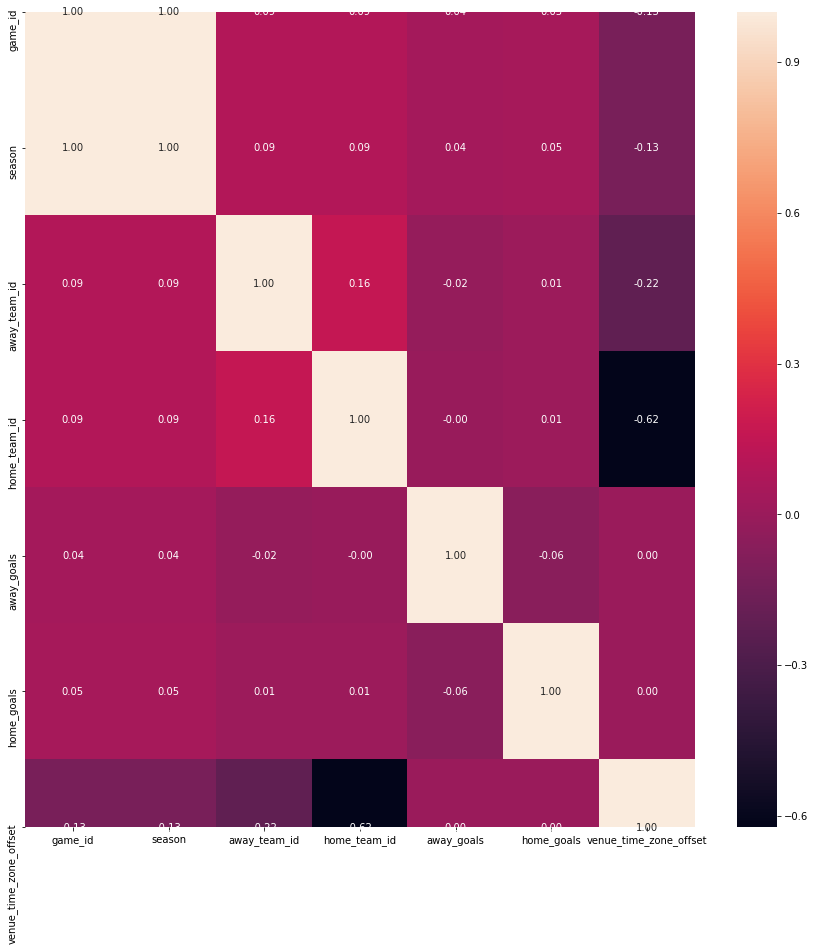

In [88]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(gameInput.corr(), ax=ax, annot=True, fmt=".2f")

## Table Goalies 
- tabuľka obsahujúca základné dáta o brankároch v jednotlivých zápasoch

In [30]:
goalieInput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24646 entries, 0 to 24645
Data columns (total 19 columns):
game_id                       24646 non-null int64
player_id                     24646 non-null int64
team_id                       24646 non-null int64
timeOnIce                     24646 non-null int64
assists                       24646 non-null int64
goals                         24646 non-null int64
pim                           24646 non-null int64
shots                         24646 non-null int64
saves                         24646 non-null int64
powerPlaySaves                24646 non-null int64
shortHandedSaves              24646 non-null int64
evenSaves                     24646 non-null int64
shortHandedShotsAgainst       24646 non-null int64
evenShotsAgainst              24646 non-null int64
powerPlayShotsAgainst         24646 non-null int64
decision                      22868 non-null object
savePercentage                24607 non-null float64
powerPlaySavePercenta

Vidíme, že atribút **savePercentage** má chýbajúce hodnoty. Rozhodli sme sa, že úspešnosť brankárov budeme počítať z počtu striel na bránu a zákrokov brankára. Takto dokážeme nahradiť chýbajúce hodnoty v stĺpci savePercentage.

Vidíme aj to, že počet záznamov o brankároch je viac ako dvojnásobok počtu zápasov. Z toho vyplýva, že v niektorých zápasoch sa brankári vystriedali. Práve preto budeme počítať úspešnosť zákrokov pre každý tím a pre každý zápas ako priemer úspešnosti zo všetkých brankárov daného tímu.

Tento proces sa vykonáva v notebooku dataset2.ipynb

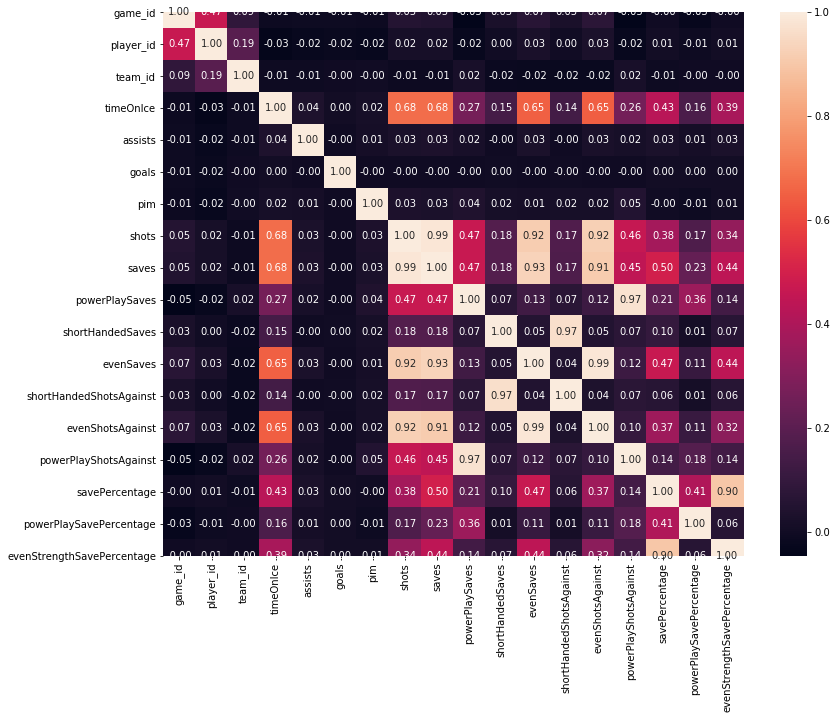

In [99]:
fig, ax = plt.subplots(figsize=(13,10))
sns.heatmap(goalieInput.corr(), ax=ax, annot=True, fmt=".2f")

## Table Skaters 
- tabuľka obsahujúca základné dáta o hráčoch v jednotlivých zápasoch

In [32]:
skaterStatsInput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411578 entries, 0 to 411577
Data columns (total 22 columns):
game_id                 411578 non-null int64
player_id               411578 non-null int64
team_id                 411578 non-null int64
timeOnIce               411578 non-null int64
assists                 411578 non-null int64
goals                   411578 non-null int64
shots                   411578 non-null int64
hits                    411578 non-null int64
powerPlayGoals          411578 non-null int64
powerPlayAssists        411578 non-null int64
penaltyMinutes          411578 non-null int64
faceOffWins             411578 non-null int64
faceoffTaken            411578 non-null int64
takeaways               411578 non-null int64
giveaways               411578 non-null int64
shortHandedGoals        411578 non-null int64
shortHandedAssists      411578 non-null int64
blocked                 411578 non-null int64
plusMinus               411578 non-null int64
evenTimeOnIce  

Tu vidíme, že v každom stĺpci máme rovnaký počet hodnôt, preto predpokladáme, že neobsahujú žiadne NaN hodnoty.

In [34]:
skaterStatsInput

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
0,2011030221,8467412,1,999,0,0,1,3,0,0,...,0,0,0,0,0,0,-1,885,98,16
1,2011030221,8468501,1,1168,0,0,0,4,0,0,...,0,1,1,0,0,1,0,767,401,0
2,2011030221,8470609,1,558,0,0,2,1,0,0,...,2,0,0,0,0,1,-1,542,0,16
3,2011030221,8471816,1,1134,0,0,1,4,0,0,...,0,1,0,0,0,1,-1,935,183,16
4,2011030221,8472410,1,436,0,0,1,3,0,0,...,6,0,0,0,0,0,-1,436,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411573,2018030417,8475807,6,501,0,0,1,2,0,0,...,0,0,0,0,0,0,-1,501,0,0
411574,2018030417,8475149,6,1062,0,0,2,0,0,0,...,1,1,0,0,0,0,-1,957,0,105
411575,2018030417,8475745,6,913,0,0,2,3,0,0,...,11,1,0,0,0,0,0,913,0,0
411576,2018030417,8478443,6,1006,0,0,1,1,0,0,...,0,0,1,0,0,2,-1,1006,0,0


Na nasledujúcej heatMape môžeme vidieť korelácie medzi jednotlivými atribútmi tabuľky. Do úvahy budeme brať hlavne atribúty goals a shots.

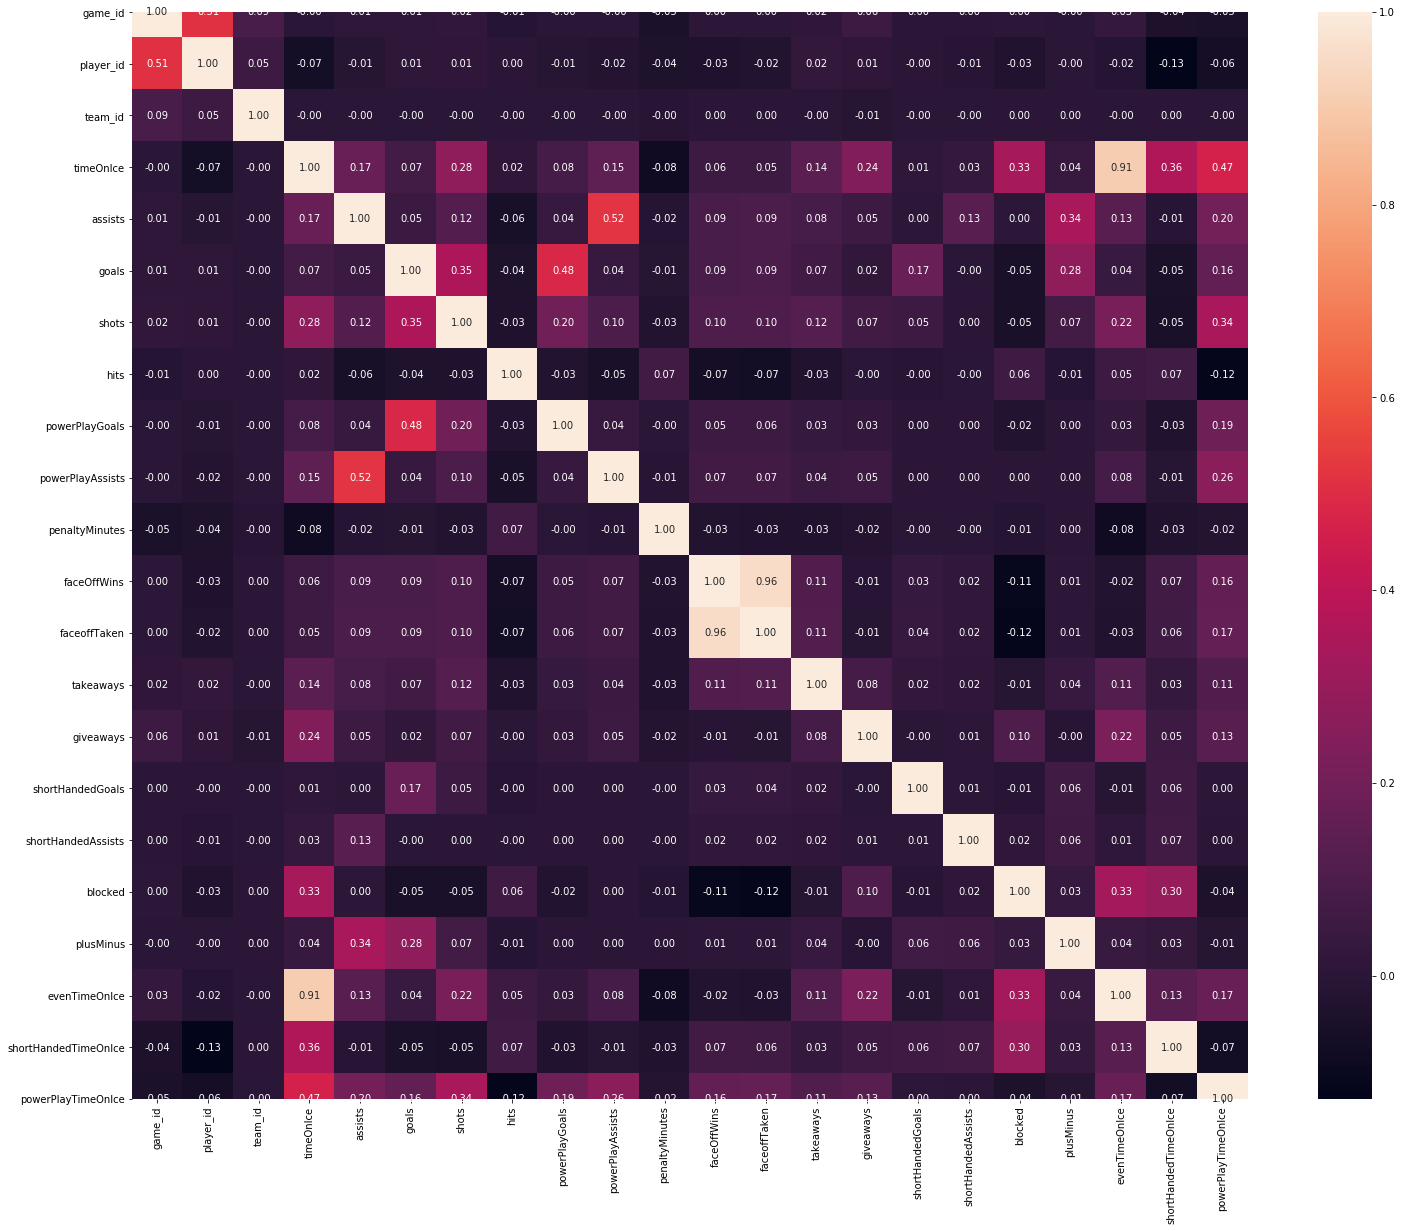

In [97]:
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(skaterStatsInput.corr(), ax=ax, annot=True, fmt=".2f")

Na nasledujúcom grafe vidíme porovnanie dvoch hodnôt, shots a goals, pre každého hráča.

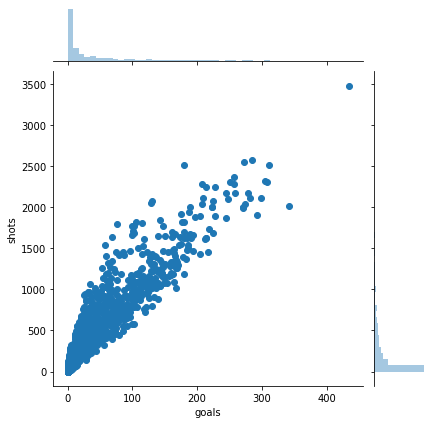

In [85]:
data=skaterStatsInput.loc[:,['player_id', 'goals', 'shots']]\
      .groupby(['player_id']).sum().reset_index()
sns.jointplot(x="goals", y="shots", data=data);

## Tabuľka teamStats
- obsahuje dáta o štatistikách jednotlivých tímov v zápasoch

In [91]:
teamsStatsInput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22868 entries, 0 to 22867
Data columns (total 15 columns):
game_id                   22868 non-null int64
team_id                   22868 non-null int64
HoA                       22868 non-null object
won                       22868 non-null bool
settled_in                22868 non-null object
head_coach                22868 non-null object
goals                     22868 non-null int64
shots                     22868 non-null int64
hits                      22868 non-null int64
pim                       22868 non-null int64
powerPlayOpportunities    22868 non-null int64
powerPlayGoals            22868 non-null int64
faceOffWinPercentage      22868 non-null float64
giveaways                 22868 non-null int64
takeaways                 22868 non-null int64
dtypes: bool(1), float64(1), int64(10), object(3)
memory usage: 2.5+ MB


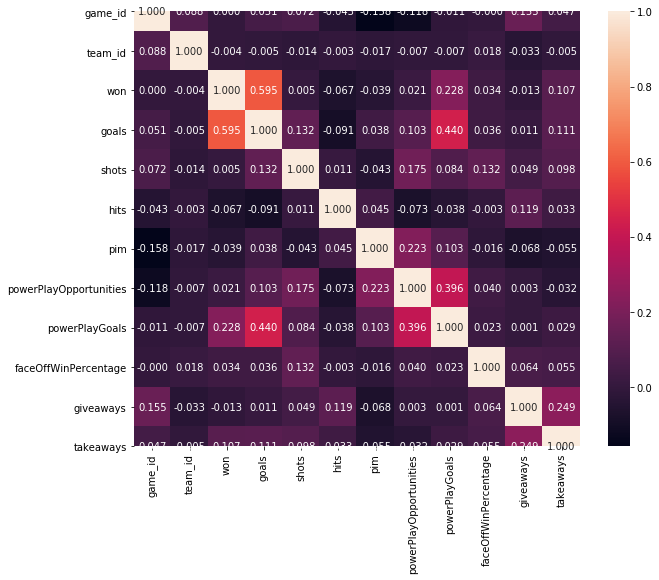

In [100]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(teamsStatsInput.corr(), ax=ax, annot=True, fmt=".3f")